<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/main/Zorislav_Vyymov/Zorislav_Vyymov_Internship_counters_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ноутбук для работы по стажировочному проекту
"Распознавание данных с общедомовых счетчиков по фото"

## Текущие непонятки. Вопросы.

### Актуальные

Вопросы.
1.	В БД есть счетчики без значений (выключенные). Надо ли отбрасывать? Ведь «в жизни» они встречаются. Возможно, их стоит использовать хотя бы на первом этапе (распознавание модели и целевых полей и ориентация).


2.	«Обвязка», как часть проекта (телеграмм-бот, пользовательский интерфейс и БД для сохранения) - эту часть проекта тоже решает группа?  (это не совсем про НС, но непосредственно связанная с ней область, в которой должна быть компетенция).


3.	Ресурсная часть в проекте откуда берется? Если сами НС (их будет несколько, явно) можно поcтроить на GoogleColab c подключением к среде (лимитированной), то  ПО на коммуникатор, сама БД показателей, и ДатаСет, к том же пополнямый – все это должно, видимо крутиться на каком то оборудовании Заказчика, как и ресурсы под готовую НС. Тем не менее, в ТЗ нет раздела типа Обязательства Заказчика с описанием вовлеченности в проект ресурсами.  Но есть требования подключения к некому удаленному серверу – он чей? Как решается этот вопрос? Возможно, мы готовим просто концепт, для проверки состоятельности решения и его демонстрации или решение должно быть прям готовым в коробке – инсталлируй и используй?

4.	Вопрос к Заказчику:
Нужна ли в распознанных данных показателей счетчиков дробная часть?


5.	Вопрос к Заказчику:
Готов ли он скорректировать бизнес-процесс дополнительной маркировкой счетчиков наклейками (для ненумерованных на корпусе приборов)?



### Ранее решенные

пока нет

## Анализ данных от Заказчика

Ссылка на отсортированный ДС:
https://drive.google.com/drive/folders/1nzzmvPDb-LQB2-ArVU7ZK4wDH_JWKZkf?usp=sharing


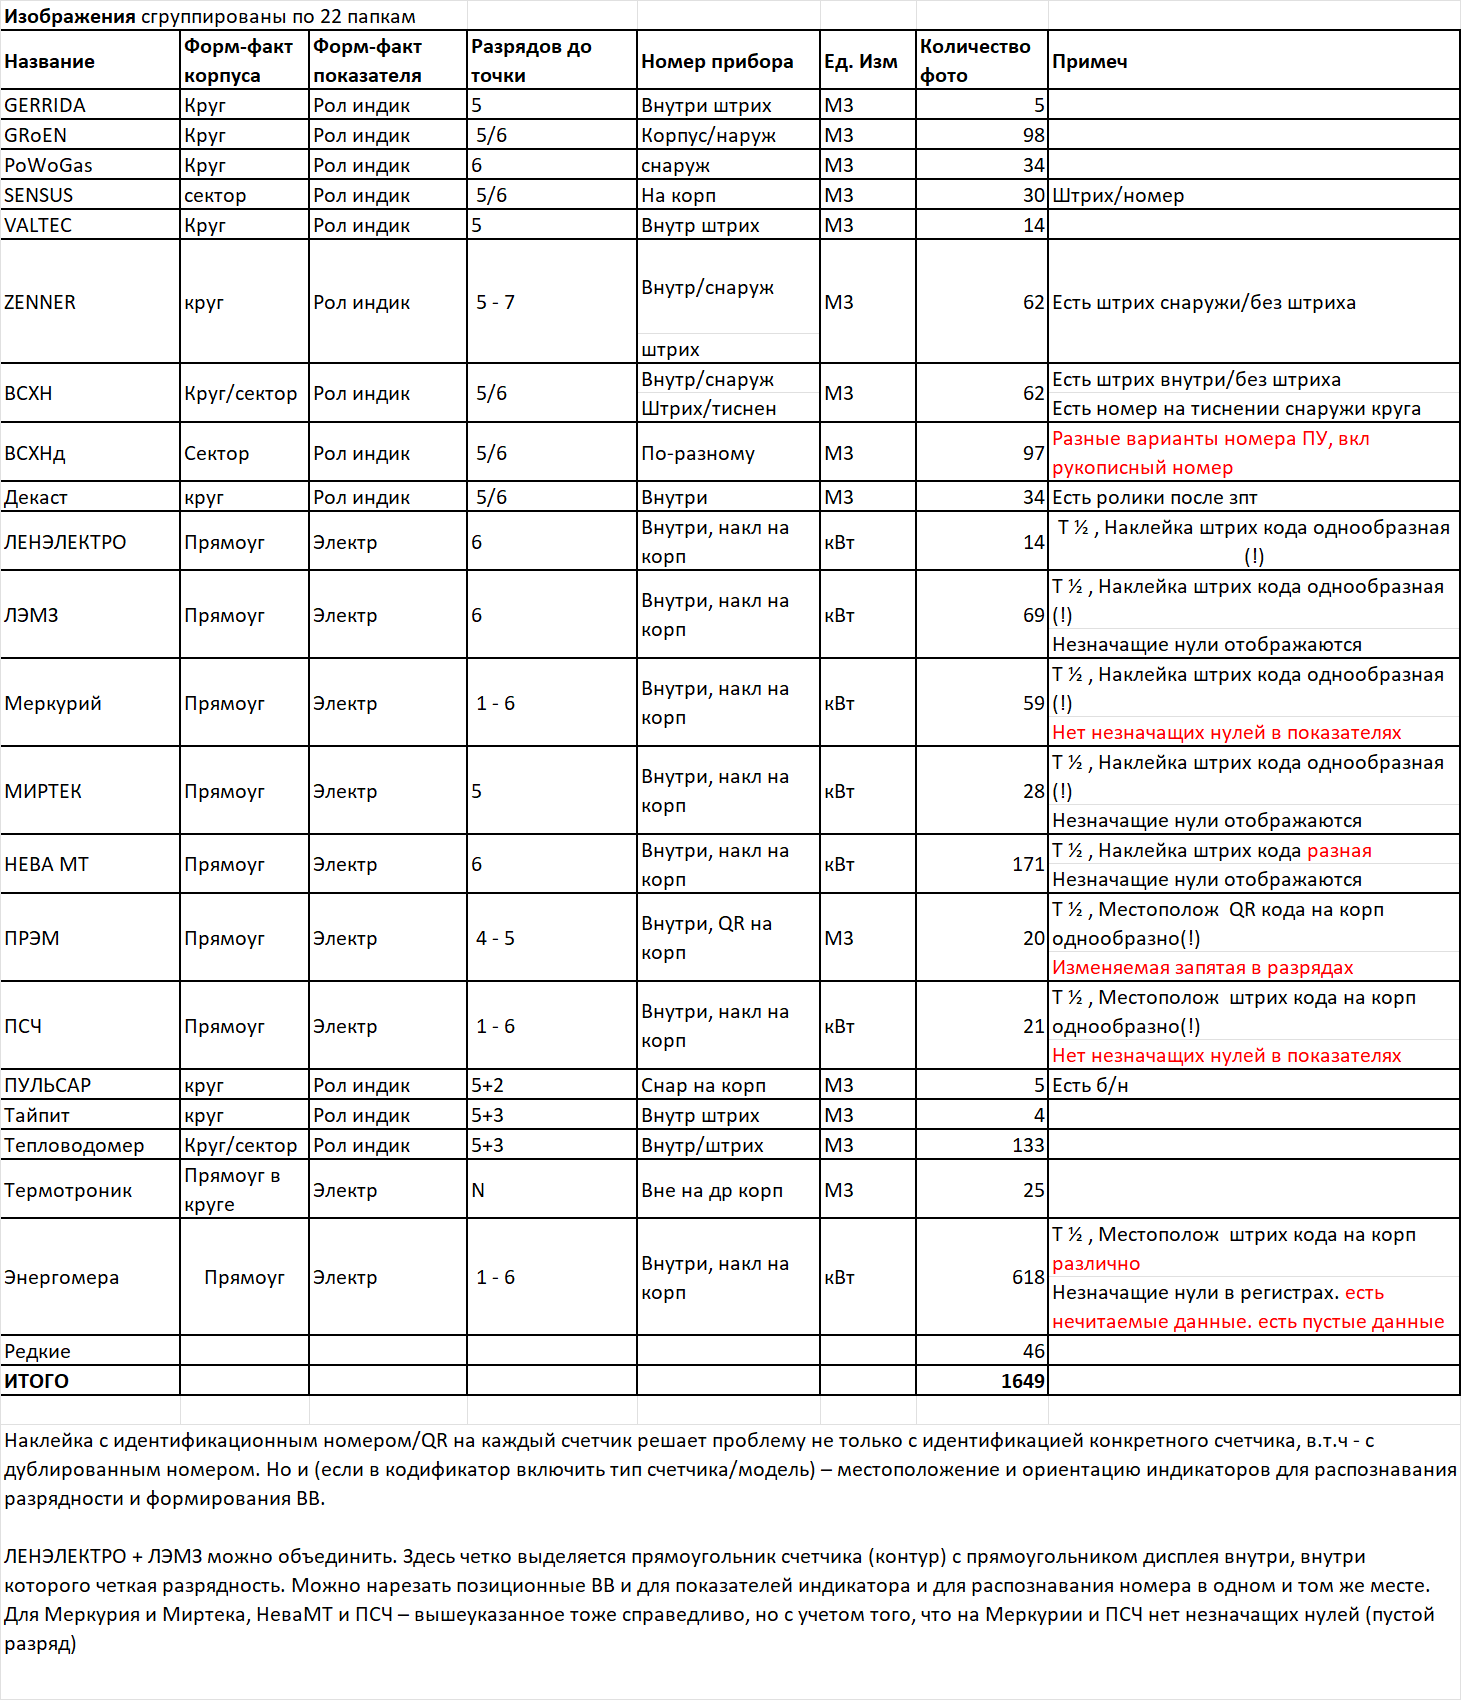

**3. Описание процесса** (дополненное к изложенному в ТЗ).

	3.1. Пользователь делает фотографию счётчика с помощью смартфона и отправляет ее через Telegram Bot.  (Выделенный чат, в котором Пользователь должен быть зарегистрирован).

	3.2. Telegram Bot получает фотографию и передает её на обработку модели распознавания с номером идентифицированного Пользователем и временем съемки (UTC).  (от Пользователя могут быть несколько фото, их надо различать).

	3.3. Модель анализирует фотографию, извлекает числовые показания и серийный номер счётчика (если все успешно). Или констатирует сбой распознавания (эти варианты сбоев должны быть четко определены).

	3.3.1. Некое ПО (возможно - сам бот) принимает результаты распознавания и готовит вопросник пользователю в вариантах от результатов распознавания (успешно/неуспешно). Вопросник адресуется идентифицированному пользователю и включает в себя исходное фото для идентификации.  
	3.4. Полученный Вопросник/данные (показания и серийный номер) отправляются обратно пользователю через Telegram Bot.

	3.5. Пользователь сверяет распознанные показания с реальными, при необходимости корректирует **И** подтверждает их (ответственность за правильность показателей в БД – на Пользователе) **ИЛИ** удаляет запрос (и делает новый с новым фото, если так проще/быстрее).
	Пользовательский интерфейс должен требовать минимальных действий пользователя для коррекции /ввода данных. Трудоемкость работы с интерфейсом, в любом случае должна быть ниже, чем простое заполнение формы с полями для внесения в БД.

	3.6. Показания заносятся в базу данных с регистрационными данными Пользователя и временем съемки (получения запроса от пользователя, если дату /время из фото не выделить или они некорректны по отношению к дате/время распознавания).   Должна быть организована выгрузка в файл из БД по запросу.


**Возможный подход к решению задачи заказчика.**


Несколько моделей НС:

1.	Карта, на которой выделяется сам счетчик и производится его классификация и выделение значимой части (показатель + номер счетчика) - YOLO ???
2.	Ориентация значимых частей – выравнивание изображений и выделение дробной части и режима индикации Т 1-3  (разные методы для электронных дисплеев и роликовых индикаторов).  YOLO ???

3.	Классификация цифр в выделенных ВВ (показатель - отдельно, номер – отдельно, режим - отдельно). OCR ???  + CV2 для предобработки изображения (шумность, контрастность)

4.	Должно быть ПО для сведения запроса Пользователя + распознанных данных и сопоставления с БД и записью в нее верифицированных пользователем данных.

5.	Нужна разметка данных под модель распознавания типа счетчика и ориентации ВВ


## Текущий план работы

#### Выполенено

1. Изучить ДС и ТЗ + Материалы по аналогам решения в чате.  Составить план ближайших работ

2. Изучить тему "Обработка данных I Работа с изображениями". Разобрать ДЗ

#### К выполнению

3. Изучить тему "Обработка данных I Формат данных для детекции объектов (yolo, xml). Проверка разметки. Конвертация форматов". Разобрать ДЗ

4.